In [2]:
import nest_asyncio  # to enable nested async event loops
nest_asyncio.apply()

import discord
from discord.ext import commands

PAGE_SIZE = 1000  # limit amount of messages per request

TOKEN = 'My Bot Token'
CHANNEL_ID = 1234567890  # replace with your channel id

intents = discord.Intents.all()
bot = commands.Bot(command_prefix='!', intents=intents)


@bot.event
async def on_ready():
    print('Bot is ready')
    
    # fetch channel
    channel = bot.get_channel(CHANNEL_ID)

    # fetch message history
    messages = []
    async for message in channel.history(limit=PAGE_SIZE):
        messages.append(message.content)  # here we're only getting message content

    # write messages to a text file
    with open('messages.txt', 'w', encoding='utf-8') as f:
        for msg in messages:
            f.write(f"{msg}\n")  

    print(f'{len(messages)} messages fetched and written to messages.txt')

    await bot.close()  # close the bot after the task

# Run bot
await bot.start(TOKEN)


Bot is ready
491 messages fetched and written to messages.txt


In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    tokenized = word_tokenize(text)
    cleaned = [stemmer.stem(word) for word in tokenized if word not in stop_words]
    return cleaned


[nltk_data] Downloading package punkt to /Users/nemaaa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nemaaa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
from textblob import TextBlob

def analyze_sentiment(text):
    return TextBlob(text).sentiment.polarity


In [5]:
def interpret_results(sentiments):
    if len(sentiments) == 0:
        return 'The sentiments list is empty'
    else:
        return sum(sentiments) / len(sentiments)


In [7]:
with open('messages.txt', 'r', encoding='utf-8') as f:
    messages_from_file = f.readlines()

# Strip newlines
messages_from_file = [message.strip() for message in messages_from_file]

sentiments = [analyze_sentiment(message) for message in messages_from_file]

average_sentiment = interpret_results(sentiments)
print(f'The average sentiment is: {average_sentiment}')



Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x10c871220>


The average sentiment is: 0.1343093793560551


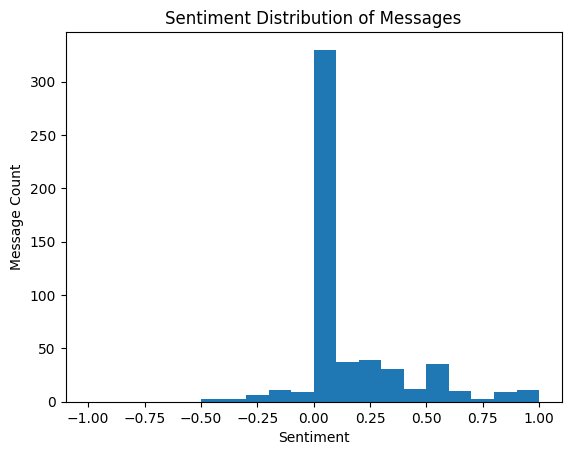

In [8]:
import matplotlib.pyplot as plt

plt.hist(sentiments, bins=20, range=(-1,1))    # make a histogram with 20 bins
plt.title('Sentiment Distribution of Messages') # title for the histogram
plt.xlabel('Sentiment')    # label for x-axis
plt.ylabel('Message Count')    # label for y-axis
plt.show()    # display the histogram
